# ML_SP22_Project_1 (DIY Decision Tree)

### Due Date: 4/15 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breast_cancer.csv')
X = df.drop(['diagnosis'], axis=1).to_numpy()
# B is benign and is encoded as 1, M is maligant and is encoded as 0
y = df['diagnosis'].apply(lambda x: 0 if x == 'M' else 1).to_numpy()

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

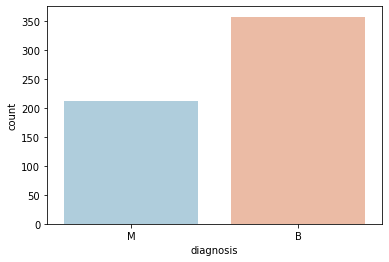

In [4]:
sns.countplot(x='diagnosis',data=df, palette='RdBu_r')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### First build the model with the standard sklearn library

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[38  4]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315


### Second use the implementation of the blog to build the model

https://towardsdatascience.com/implementing-a-decision-tree-from-scratch-f5358ff9c4bb

In [8]:
from DT_orig import DecisionTree
model = DecisionTree(max_depth=10)
model.fit(X_train, y_train)

Done fitting


In [9]:
from DT_orig import accuracy_score
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.956140350877193


### Note that the original implementation will not work if y is a categorical variable and it is expecting numpy array instead of DataFrame

In [10]:
X = df.drop(['diagnosis'], axis=1).to_numpy()
#y = df['diagnosis'].apply(lambda x: 0 if x == 'M' else 1).to_numpy()
y = df['diagnosis'].to_numpy()
y[:10]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
print(accuracy_score(y_test, predictions))

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

### Finally use your own improved implementation to build the model

In [ ]:
from DT_mohammed_chowdhury import DecisionTreeModel
# replace the above with your version
model = DecisionTreeModel(max_depth=10)

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
# make sure your model will work with y being a categorcal variable as well
#y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
type(X_train)

In [ ]:
model.fit(X_train, y_train)

### Call your own performance report

In [ ]:
from DT_mohammed_chowdhury import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

### Finally call your RandomForest Model just like the standard sklearn library

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

In [ ]:
# Type your code here
from DT_mohammed_chowdhury import RandomForestModel
from DT_mohammed_chowdhury import classification_report,confusion_matrix,accuracy_score

rfc = RandomForestModel(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

### For graduate students only, try different value for the impurity threshold for the Decision Tree Model comment on of the impact of the parameter (if there is any) on the model performance

In [ ]:
# Type your code here